In [6]:
import pandas as pd
import numpy as np
from pytrends.request import TrendReq
from pytrends import dailydata
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
import os
from pathlib import Path

BTC-USD:2022-09-01 2022-09-30
BTC-USD:2022-10-01 2022-10-31
BTC-USD:2022-11-01 2022-11-30
BTC-USD:2022-06-01 2022-06-30
BTC-USD:2022-07-01 2022-07-31
BTC-USD:2022-08-01 2022-08-31
BTC-USD:2022-03-01 2022-03-31
BTC-USD:2022-04-01 2022-04-30
BTC-USD:2022-05-01 2022-05-31
(<AxesSubplot:title={'center':'BTC-USD Correlation Plot'}, xlabel='BTC-USD', ylabel='sentiment_score_BTC-USD'>, <AxesSubplot:title={'center':'BTC-USD Daily Return Correlation with Sentiment Plot'}, xlabel='Daily_Return', ylabel='sentiment_score_BTC-USD'>)


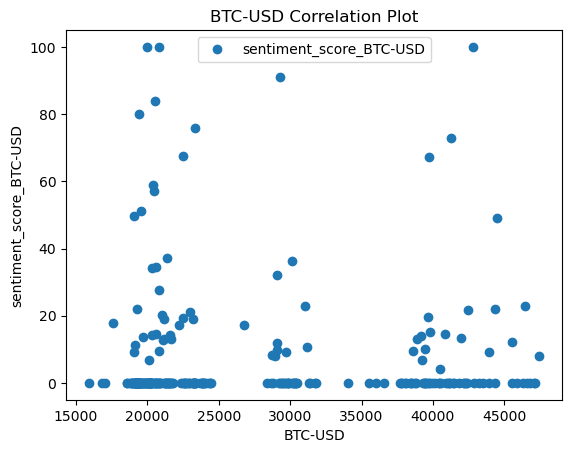

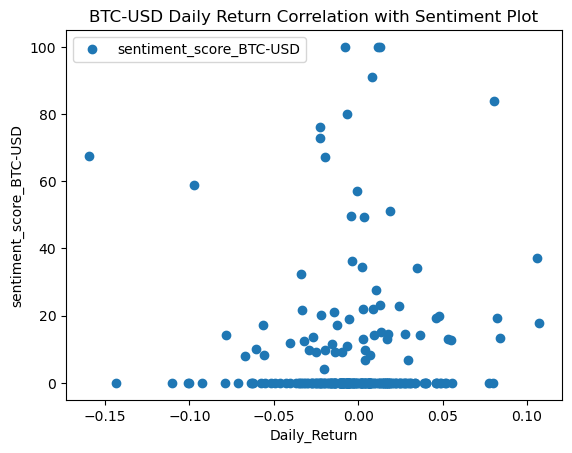

In [5]:
"""
Needs trouble shooting because currently not displaying any graphs when imported to another file
"""

def generate_trends_analysis(key_word):

    trends1 = dailydata.get_daily_data(key_word, 2022, 9, 2022, 11, geo='US')
    trends2 = dailydata.get_daily_data(key_word, 2022, 6, 2022, 8, geo='US')
    trends3 = dailydata.get_daily_data(key_word, 2022, 3, 2022, 5, geo='US')


    trends_combined = pd.concat([trends1, trends2, trends3], axis='rows', join='inner')
    trends_combined.sort_index(ascending=True, inplace=True)
    trends_combined.drop(columns=[f'{key_word}_unscaled', f'{key_word}_monthly', 'isPartial', 'scale'], inplace=True)
    trends_combined.columns = [f'sentiment_score_{key_word}']

    # return trends_combined


    # Gets the historical abs value of the asset
    asset_historical_df = web.get_data_yahoo([key_word], '10/31/2017', interval='d')
    asset_historical_df = asset_historical_df.iloc[:, [0,1,2]]
    asset_historical_df = asset_historical_df['Close']
    asset_historical_df.columns = [' '.join(col).strip() for col in asset_historical_df.columns.values]

    # concat and plot correlation ABS
    absolute_price_correlation_df = pd.concat([asset_historical_df, trends_combined], axis="columns", join="inner")
    absolute_price_correlation_df.columns = [key_word, f'sentiment_score_{key_word}']
    
    # return absolute_price_correlation_df

    plot1 = absolute_price_correlation_df.plot(x=key_word, y=f'sentiment_score_{key_word}', style= 'o')
    plot2 = plt.xlabel(key_word)
    plot3 = plt.ylabel(f'sentiment_score_{key_word}')
    plt.title(f"{key_word} Correlation Plot")
    # return plot1


    # concat and plot correlation daily returns
    daily_return_correlation = absolute_price_correlation_df.copy()
    daily_return_correlation['Daily_Return'] = daily_return_correlation[key_word].pct_change()
    daily_return_correlation.drop(columns=[key_word], inplace=True)
    daily_return_correlation.dropna(inplace=True)
    plot4 = daily_return_correlation.plot(x='Daily_Return', y=f'sentiment_score_{key_word}', style= 'o')
    plot5 = plt.xlabel("Daily_Return")
    plot6 = plt.ylabel(f'sentiment_score_{key_word}')
    plt.title(f"{key_word} Daily Return Correlation with Sentiment Plot")
    
    return plot1, plot4

    



# print(generate_trends_analysis("BTC-USD"))


SPY:2022-09-01 2022-09-30
SPY:2022-10-01 2022-10-31
SPY:2022-11-01 2022-11-30


<AxesSubplot:title={'center':'SPY Daily Return Correlation with Sentiment Plot'}>

<AxesSubplot:title={'center':'SPY Daily Return Correlation with Sentiment Plot'}>

(None, None)


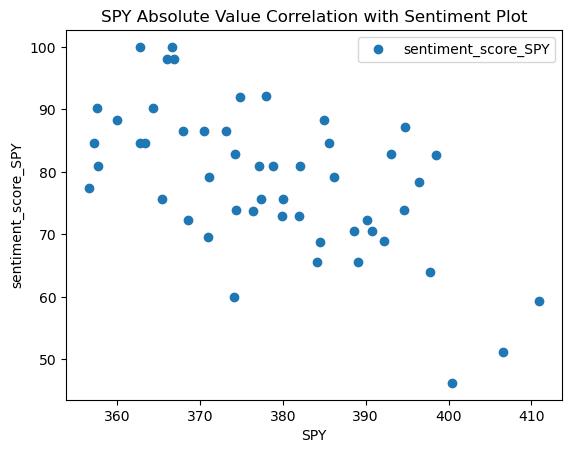

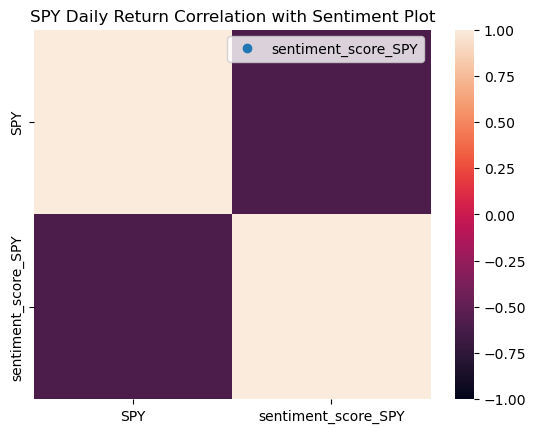

In [19]:
# Just for testing. shorter version

def generate_trends_analysis2(key_word):

    trends1 = dailydata.get_daily_data(key_word, 2022, 9, 2022, 11, geo='US')
    # trends2 = dailydata.get_daily_data(key_word, 2022, 6, 2022, 8, geo='US')
    # trends3 = dailydata.get_daily_data(key_word, 2022, 3, 2022, 5, geo='US')


    trends_combined = pd.concat([trends1], axis='rows', join='inner')
    trends_combined.sort_index(ascending=True, inplace=True)
    trends_combined.drop(columns=[f'{key_word}_unscaled', f'{key_word}_monthly', 'isPartial', 'scale'], inplace=True)
    trends_combined.columns = [f'sentiment_score_{key_word}']

    # return trends_combined


    # Gets the historical abs value of the asset
    asset_historical_df = web.get_data_yahoo([key_word], '10/31/2017', interval='d')
    asset_historical_df = asset_historical_df.iloc[:, [0,1,2]]
    asset_historical_df = asset_historical_df['Close']
    asset_historical_df.columns = [' '.join(col).strip() for col in asset_historical_df.columns.values]

    # concat and plot correlation ABS
    absolute_price_correlation_df = pd.concat([asset_historical_df, trends_combined], axis="columns", join="inner")
    absolute_price_correlation_df.columns = [key_word, f'sentiment_score_{key_word}']
    
    # return absolute_price_correlation_df
    plot1 = absolute_price_correlation_df.plot(x=key_word, y=f'sentiment_score_{key_word}', style= 'o')
    plot2 = plt.xlabel(key_word)
    plot3 = plt.ylabel(f'sentiment_score_{key_word}')
    plt.title(f"{key_word} Absolute Value Correlation with Sentiment Plot")
    # return plot1


    # concat and plot correlation daily returns
    # Adds the pct_change()
    daily_return_correlation = absolute_price_correlation_df.copy()
    daily_return_correlation['Daily_Return'] = daily_return_correlation[key_word].pct_change()
    daily_return_correlation.drop(columns=[key_word], inplace=True)
    daily_return_correlation.dropna(inplace=True)
    plot4 = daily_return_correlation.plot(x='Daily_Return', y=f'sentiment_score_{key_word}', style= 'o')
    plot5 = plt.xlabel("Daily_Return")
    plot6 = plt.ylabel(f'sentiment_score_{key_word}')
    plt.title(f"{key_word} Daily Return Correlation with Sentiment Plot")

    # return plot1, plot4

    # calculate which is more correlated
    
    
    # Plot heatmap
    correlation = absolute_price_correlation_df.corr()
    corr_plot = sns.heatmap(correlation, vmin=-1, vmax=1)
    
    # return display(plot1), display(plot4), display(corr_plot)
    return display(plot4), display(corr_plot)



# print(generate_trends_analysis2("SPY"))

stock market:2022-09-01 2022-09-30
stock market:2022-10-01 2022-10-31
stock market:2022-11-01 2022-11-30


<AxesSubplot:title={'center':'^GSPC Daily Return Correlation with stock market Sentiment Plot'}>

<AxesSubplot:title={'center':'^GSPC Daily Return Correlation with stock market Sentiment Plot'}>

(None, None)


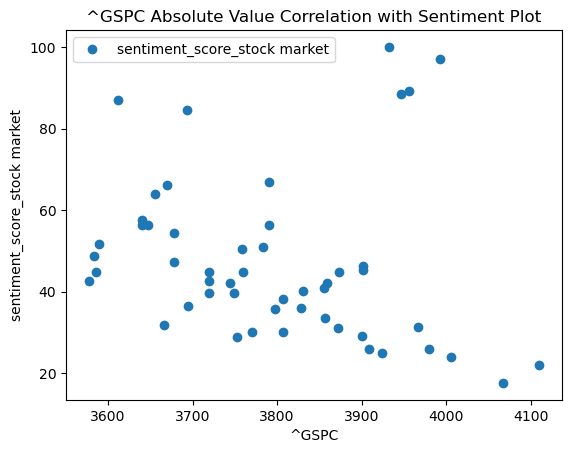

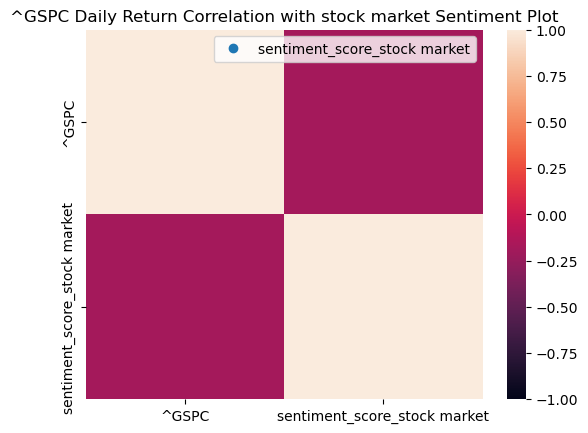

In [22]:
# Testing new function
# Takes a ticker symbol and a search
# Generates analysis


def trend_analysis_expanded(ticker_symbol, search_term):

    trends1 = dailydata.get_daily_data(search_term, 2022, 9, 2022, 11, geo='US')
    # trends2 = dailydata.get_daily_data(key_word, 2022, 6, 2022, 8, geo='US')
    # trends3 = dailydata.get_daily_data(key_word, 2022, 3, 2022, 5, geo='US')


    trends_combined = pd.concat([trends1], axis='rows', join='inner')
    trends_combined.sort_index(ascending=True, inplace=True)
    trends_combined.drop(columns=[f'{search_term}_unscaled', f'{search_term}_monthly', 'isPartial', 'scale'], inplace=True)
    trends_combined.columns = [f'sentiment_score_{search_term}']

    # return trends_combined


    # Gets the historical abs value of the asset
    asset_historical_df = web.get_data_yahoo([ticker_symbol], '10/31/2017', interval='d')
    asset_historical_df = asset_historical_df.iloc[:, [0,1,2]]
    asset_historical_df = asset_historical_df['Close']
    asset_historical_df.columns = [' '.join(col).strip() for col in asset_historical_df.columns.values]

    # concat and plot correlation ABS
    absolute_price_correlation_df = pd.concat([asset_historical_df, trends_combined], axis="columns", join="inner")
    absolute_price_correlation_df.columns = [ticker_symbol, f'sentiment_score_{search_term}']
    
    # return absolute_price_correlation_df
    plot1 = absolute_price_correlation_df.plot(x=ticker_symbol, y=f'sentiment_score_{search_term}', style= 'o')
    plot2 = plt.xlabel(ticker_symbol)
    plot3 = plt.ylabel(f'sentiment_score_{search_term}')
    plt.title(f"{ticker_symbol} Absolute Value Correlation with Sentiment Plot")
    # return plot1


    # concat and plot correlation daily returns
    # Adds the pct_change()
    daily_return_correlation = absolute_price_correlation_df.copy()
    daily_return_correlation['Daily_Return'] = daily_return_correlation[ticker_symbol].pct_change()
    daily_return_correlation.drop(columns=[ticker_symbol], inplace=True)
    daily_return_correlation.dropna(inplace=True)
    plot4 = daily_return_correlation.plot(x='Daily_Return', y=f'sentiment_score_{search_term}', style= 'o')
    plot5 = plt.xlabel("Daily_Return")
    plot6 = plt.ylabel(f'sentiment_score_{search_term}')
    plt.title(f"{ticker_symbol} Daily Return Correlation with {search_term} Sentiment Plot")

    # return plot1, plot4

    # calculate which is more correlated
    
    
    # Plot heatmap
    correlation = absolute_price_correlation_df.corr()
    corr_plot = sns.heatmap(correlation, vmin=-1, vmax=1)
    
    # return display(plot1), display(plot4), display(corr_plot)
    return display(plot4), display(corr_plot)



print(trend_analysis_expanded("^GSPC","stock market"))

iphone:2022-09-01 2022-09-30
iphone:2022-10-01 2022-10-31
iphone:2022-11-01 2022-11-30


<AxesSubplot:title={'center':'AAPL Daily Return Correlation with iphone Sentiment Plot'}>

<AxesSubplot:title={'center':'AAPL Daily Return Correlation with iphone Sentiment Plot'}>

(None, None)

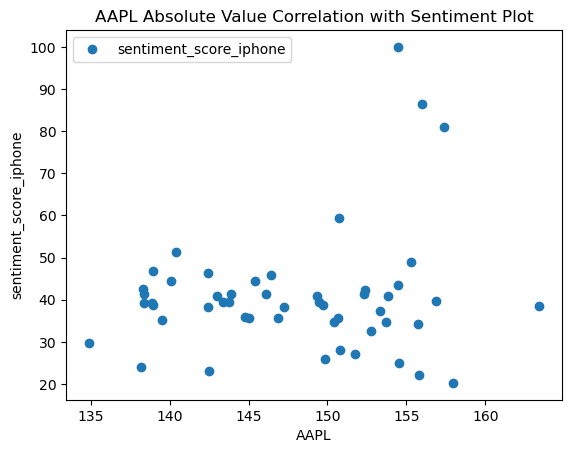

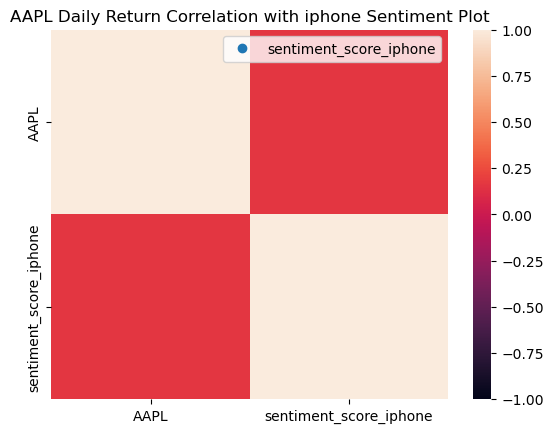

In [24]:
trend_analysis_expanded("AAPL", "iphone")

energy prices:2022-09-01 2022-09-30
energy prices:2022-10-01 2022-10-31
energy prices:2022-11-01 2022-11-30


<AxesSubplot:title={'center':'^GSPC Daily Return Correlation with energy prices Sentiment Plot'}>

<AxesSubplot:title={'center':'^GSPC Daily Return Correlation with energy prices Sentiment Plot'}>

(None, None)

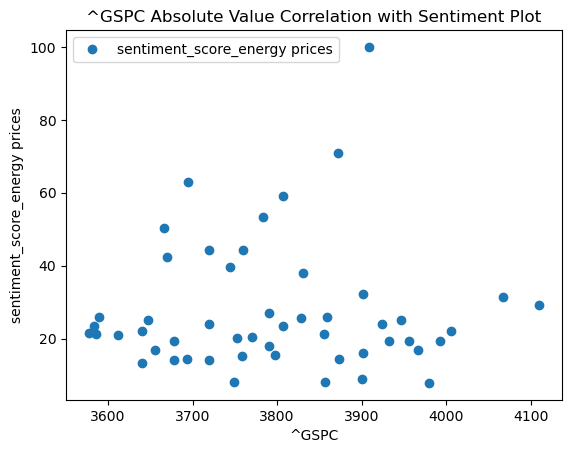

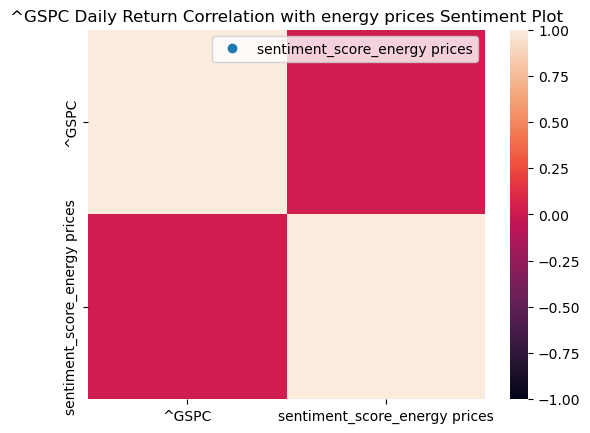

In [25]:
trend_analysis_expanded("^GSPC", "energy prices")

inflation:2022-09-01 2022-09-30
inflation:2022-10-01 2022-10-31
inflation:2022-11-01 2022-11-30


<AxesSubplot:title={'center':'^GSPC Daily Return Correlation with inflation Sentiment Plot'}>

<AxesSubplot:title={'center':'^GSPC Daily Return Correlation with inflation Sentiment Plot'}>

(None, None)

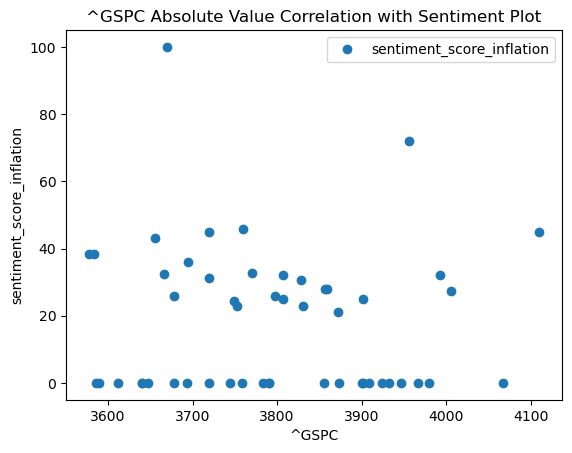

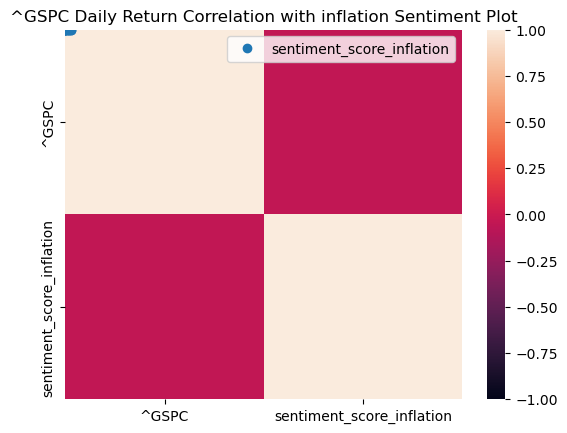

In [26]:
trend_analysis_expanded("^GSPC", "inflation")

^GSPC:2022-09-01 2022-09-30
^GSPC:2022-10-01 2022-10-31
^GSPC:2022-11-01 2022-11-30


<AxesSubplot:title={'center':'^GSPC Absolute Value Correlation with Sentiment Plot'}, xlabel='^GSPC', ylabel='sentiment_score_^GSPC'>

<AxesSubplot:title={'center':'^GSPC Daily Return Correlation with Sentiment Plot'}>

<AxesSubplot:title={'center':'^GSPC Daily Return Correlation with Sentiment Plot'}>

(None, None, None)


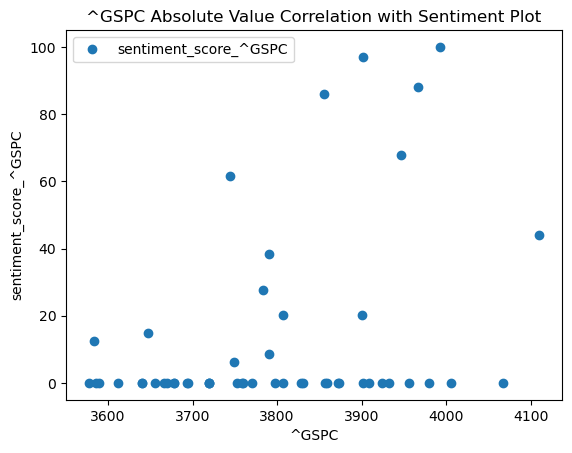

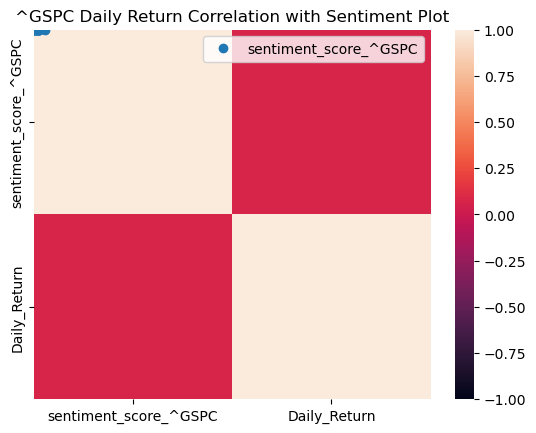

In [14]:
print(generate_trends_analysis2("^GSPC"))

AAPL:2022-09-01 2022-09-30
AAPL:2022-10-01 2022-10-31
AAPL:2022-11-01 2022-11-30


<AxesSubplot:title={'center':'AAPL Absolute Value Correlation with Sentiment Plot'}, xlabel='AAPL', ylabel='sentiment_score_AAPL'>

<AxesSubplot:title={'center':'AAPL Daily Return Correlation with Sentiment Plot'}>

<AxesSubplot:title={'center':'AAPL Daily Return Correlation with Sentiment Plot'}>

(None, None, None)


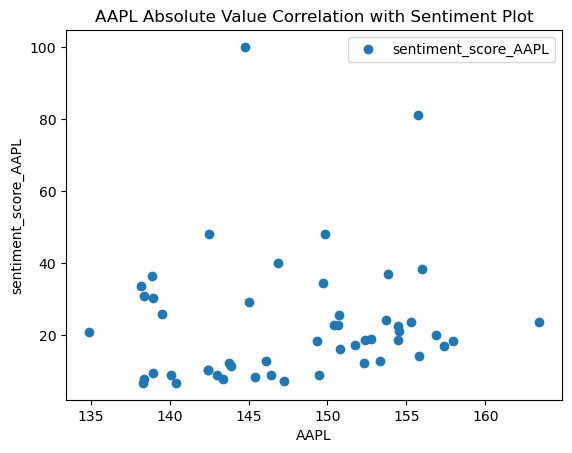

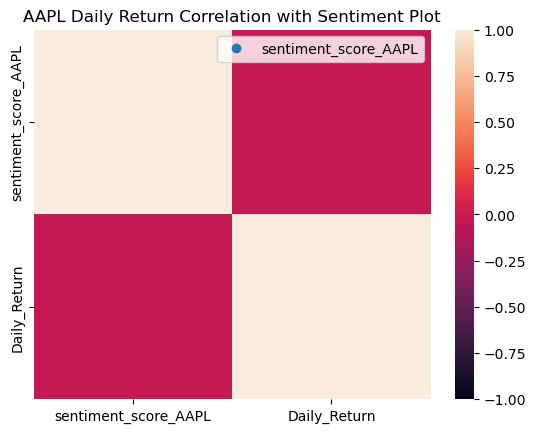

In [17]:
print(generate_trends_analysis2("AAPL"))

In [1]:
# Just for testing. shorter version

def generate_trends_analysis3(key_word):

    trends1 = dailydata.get_daily_data(key_word, 2022, 9, 2022, 11, geo='US')
    # trends2 = dailydata.get_daily_data(key_word, 2022, 6, 2022, 8, geo='US')
    # trends3 = dailydata.get_daily_data(key_word, 2022, 3, 2022, 5, geo='US')


    trends_combined = pd.concat([trends1], axis='rows', join='inner')
    trends_combined.sort_index(ascending=True, inplace=True)
    trends_combined.drop(columns=[f'{key_word}_unscaled', f'{key_word}_monthly', 'isPartial', 'scale'], inplace=True)
    trends_combined.columns = [f'sentiment_score_{key_word}']

    # return trends_combined


    # Gets the historical abs value of the asset
    asset_historical_df = web.get_data_yahoo([key_word], '10/31/2017', interval='d')
    asset_historical_df = asset_historical_df.iloc[:, [0,1,2]]
    asset_historical_df = asset_historical_df['Close']
    asset_historical_df.columns = [' '.join(col).strip() for col in asset_historical_df.columns.values]

    # concat and plot correlation ABS
    absolute_price_correlation_df = pd.concat([asset_historical_df, trends_combined], axis="columns", join="inner")
    absolute_price_correlation_df.columns = [key_word, f'sentiment_score_{key_word}']
    
    # return absolute_price_correlation_df
    plot1 = absolute_price_correlation_df.plot(x=key_word, y=f'sentiment_score_{key_word}', style= 'o')
    plot2 = plt.xlabel(key_word)
    plot3 = plt.ylabel(f'sentiment_score_{key_word}')
    plt.title(f"{key_word} Absolute Value Correlation with Sentiment Plot")
    # return plot1


    # concat and plot correlation daily returns
    # Adds the pct_change()
    daily_return_correlation = absolute_price_correlation_df.copy()
    daily_return_correlation['Daily_Return'] = daily_return_correlation[key_word].pct_change()
    daily_return_correlation.drop(columns=[key_word], inplace=True)
    daily_return_correlation.dropna(inplace=True)
    plot4 = daily_return_correlation.plot(x='Daily_Return', y=f'sentiment_score_{key_word}', style= 'o')
    plot5 = plt.xlabel("Daily_Return")
    plot6 = plt.ylabel(f'sentiment_score_{key_word}')
    plt.title(f"{key_word} Daily Return Correlation with Sentiment Plot")

    return plot1, plot4






CL=F:2022-09-01 2022-09-30
CL=F:2022-10-01 2022-10-31
CL=F:2022-11-01 2022-11-30


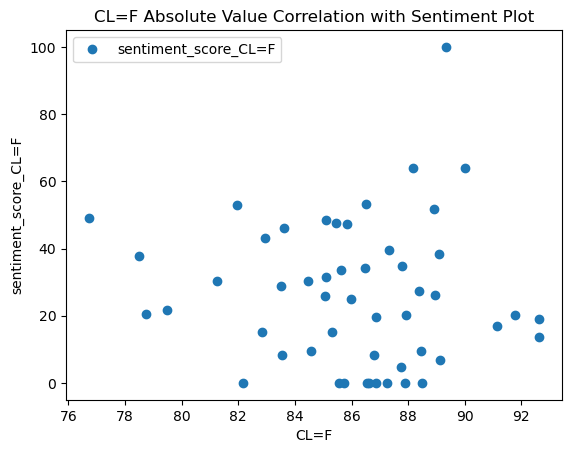

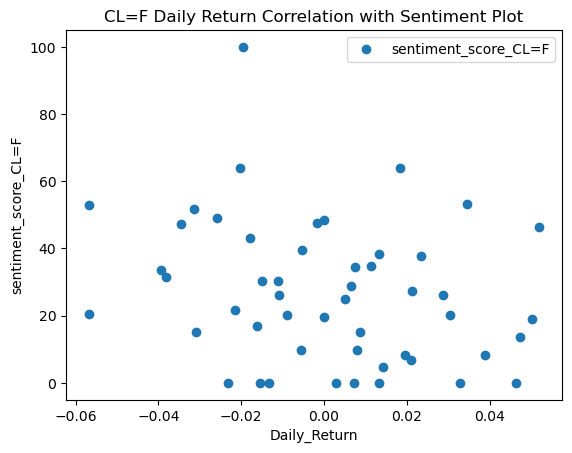

In [66]:
# generate_trends_analysis2("CL=F")

SPY:2022-09-01 2022-09-30
SPY:2022-10-01 2022-10-31
SPY:2022-11-01 2022-11-30


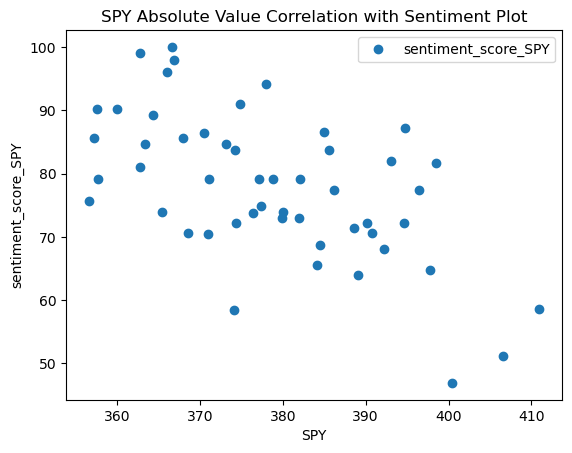

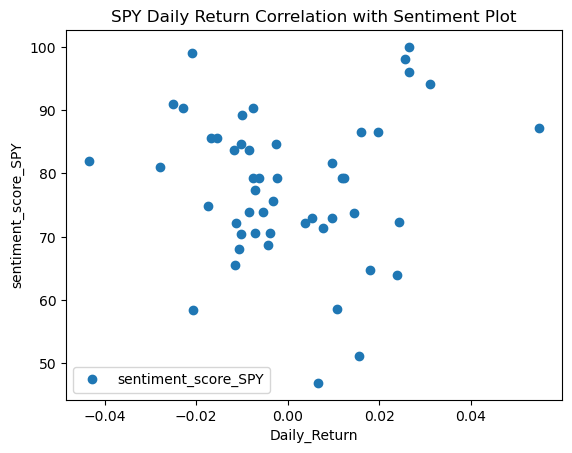

In [60]:
# generate_trends_analysis("SPY")

^GSPC:2022-09-01 2022-09-30
^GSPC:2022-10-01 2022-10-31
^GSPC:2022-11-01 2022-11-30


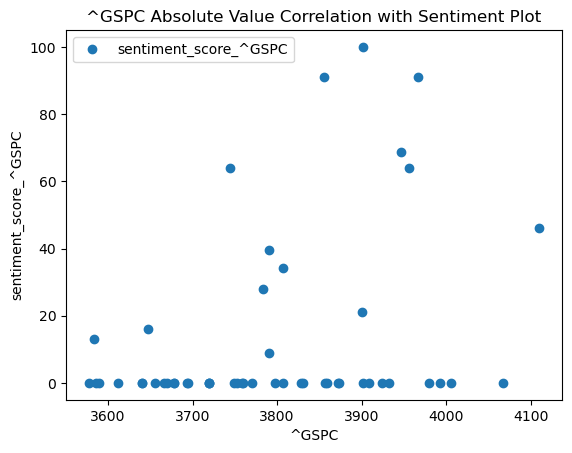

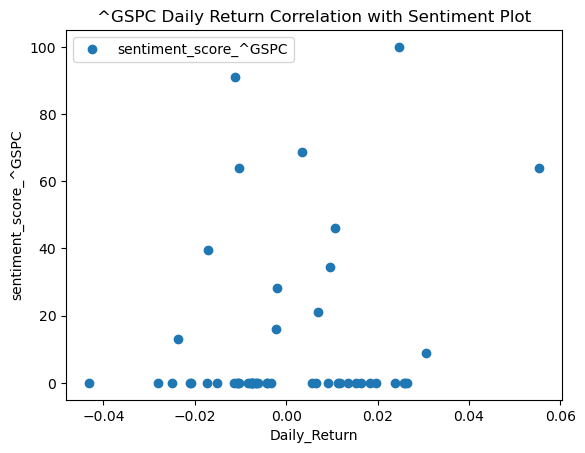

In [61]:
# generate_trends_analysis('^GSPC')

BTC-USD:2022-09-01 2022-09-30
BTC-USD:2022-10-01 2022-10-31
BTC-USD:2022-11-01 2022-11-30
AxesSubplot(0.125,0.11;0.775x0.77)


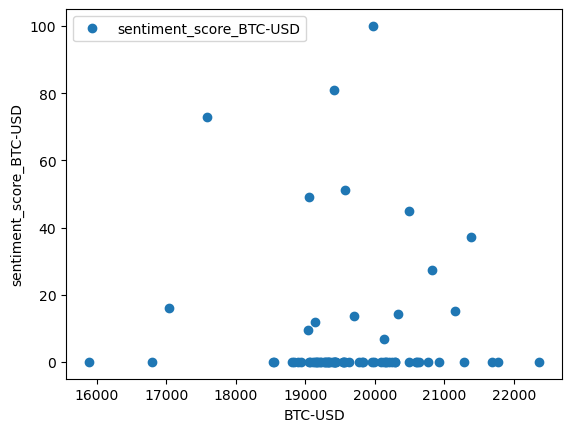

In [36]:
# # Just for testing. shorter version

def generate_trends_analysis(key_word):

    trends1 = dailydata.get_daily_data(key_word, 2022, 9, 2022, 11, geo='US')
    # trends2 = dailydata.get_daily_data(key_word, 2022, 6, 2022, 8, geo='US')
    # trends3 = dailydata.get_daily_data(key_word, 2022, 3, 2022, 5, geo='US')


    trends_combined = pd.concat([trends1], axis='rows', join='inner')
    trends_combined.sort_index(ascending=True, inplace=True)
    trends_combined.drop(columns=[f'{key_word}_unscaled', f'{key_word}_monthly', 'isPartial', 'scale'], inplace=True)
    trends_combined.columns = [key_word, f'sentiment_score_{key_word}']

    # return trends_combined


    # Gets the historical abs value of the asset
    asset_historical_df = web.get_data_yahoo([key_word], '10/31/2017', interval='d')
    asset_historical_df = asset_historical_df.iloc[:, [0,1,2]]
    asset_historical_df = asset_historical_df['Close']
    asset_historical_df.columns = [' '.join(col).strip() for col in asset_historical_df.columns.values]

    # concat and plot correlation ABS
    absolute_price_correlation_df = pd.concat([asset_historical_df, trends_combined], axis="columns", join="inner")
    # return absolute_price_correlation_df

    plot1 = absolute_price_correlation_df.plot(x=key_word, y='sentiment_score_BTC-USD', style= 'o')
    plot2 = plt.xlabel(key_word)
    plot3 = plt.ylabel(f'sentiment_score_{key_word}')
    # return plot.plt.show
    return plot1


    # concat and plot correlation daily returns



# print(generate_trends_analysis("BTC-USD"))


In [40]:
# # Just for testing. shorter version

def generate_trends_analysis(key_word):

    trends1 = dailydata.get_daily_data(key_word, 2022, 9, 2022, 11, geo='US')
    # trends2 = dailydata.get_daily_data(key_word, 2022, 6, 2022, 8, geo='US')
    # trends3 = dailydata.get_daily_data(key_word, 2022, 3, 2022, 5, geo='US')


    trends_combined = pd.concat([trends1], axis='rows', join='inner')
    trends_combined.sort_index(ascending=True, inplace=True)
    trends_combined.drop(columns=[f'{key_word}_unscaled', f'{key_word}_monthly', 'isPartial', 'scale'], inplace=True)
    trends_combined.columns = [key_word, f'sentiment_score_{key_word}']

    # return trends_combined


    # Gets the historical abs value of the asset
    asset_historical_df = web.get_data_yahoo([key_word], '10/31/2017', interval='d')
    asset_historical_df = asset_historical_df.iloc[:, [0,1,2]]
    asset_historical_df = asset_historical_df['Close']
    asset_historical_df.columns = [' '.join(col).strip() for col in asset_historical_df.columns.values]

    # concat and plot correlation ABS
    absolute_price_correlation_df = pd.concat([asset_historical_df, trends_combined], axis="columns", join="inner")
    # return absolute_price_correlation_df

    plot1 = absolute_price_correlation_df.plot(x=key_word, y='sentiment_score_BTC-USD', style= 'o')
    plot2 = plt.xlabel(key_word)
    plot3 = plt.ylabel(f'sentiment_score_{key_word}')
    # return plot.plt.show
    return plot1


    # concat and plot correlation daily returns



# print(generate_trends_analysis("BTC-USD"))

BTC-USD:2022-09-01 2022-09-30
BTC-USD:2022-10-01 2022-10-31
BTC-USD:2022-11-01 2022-11-30


ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [29]:
def generate_trends_analysis(key_word):

    trends1 = dailydata.get_daily_data(key_word, 2022, 9, 2022, 11, geo='US')
    trends2 = dailydata.get_daily_data(key_word, 2022, 6, 2022, 8, geo='US')
    trends3 = dailydata.get_daily_data(key_word, 2022, 3, 2022, 5, geo='US')


    trends_combined = pd.concat([trends1, trends2, trends3], axis='rows', join='inner')
    trends_combined.sort_index(ascending=True, inplace=True)
    trends_combined.drop(columns=[f'{key_word}_unscaled', f'{key_word}_monthly', 'isPartial', 'scale'], inplace=True)
    # trends_combined.columns = [f'sentiment_score_{key_word}']

    # return trends_combined


    # Gets the historical abs value of the asset
    asset_historical_df = web.get_data_yahoo([key_word], '10/31/2017', interval='d')
    asset_historical_df = asset_historical_df.iloc[:, [0,1,2]]
    asset_historical_df = asset_historical_df['Close']
    asset_historical_df.columns = [' '.join(col).strip() for col in asset_historical_df.columns.values]

    # concat and plot correlation ABS
    absolute_price_correlation_df = pd.concat([asset_historical_df, trends_combined], axis="columns", join="inner")
    absolute_price_correlation_df.columns = [key_word, f"sentiment_score_{key_word}"]
    return absolute_price_correlation_df

    # absolute_price_correlation_df.plot(x=key_word, y=f'sentiment_score_{key_word}', style= 'o')
    # plt.xlabel(key_word)
    # plt.ylabel(f'sentiment_score_{key_word}')
    # return plt.show


    # concat and plot correlation daily returns



# print(generate_trends_analysis("BTC-USD"))

BTC-USD:2022-09-01 2022-09-30
BTC-USD:2022-10-01 2022-10-31
BTC-USD:2022-11-01 2022-11-30
BTC-USD:2022-06-01 2022-06-30
BTC-USD:2022-07-01 2022-07-31
BTC-USD:2022-08-01 2022-08-31
BTC-USD:2022-03-01 2022-03-31
BTC-USD:2022-04-01 2022-04-30
BTC-USD:2022-05-01 2022-05-31
            B T C - U S D  sentiment_score_BTC-USD
2022-03-01   44354.636719                     0.00
2022-03-02   43924.117188                     9.36
2022-03-03   42451.789062                    22.00
2022-03-04   39137.605469                    14.08
2022-03-05   39400.585938                     0.00
...                   ...                      ...
2022-11-08   18541.271484                     0.00
2022-11-09   15880.780273                     0.00
2022-11-10   17586.771484                    73.00
2022-11-11   17034.292969                    15.98
2022-11-12   16799.185547                     0.00

[257 rows x 2 columns]


In [15]:
# asset_historical_df = web.get_data_yahoo(["BTC-USD"], '10/31/2017', interval='d')
# asset_historical_df = asset_historical_df.iloc[:, [0,1,2]]
# asset_historical_df = asset_historical_df['Close']
# # asset_historical_df.drop(columns=['Ad'])
# asset_historical_df

Attributes,Adj Close,Close,High
Symbols,BTC-USD,BTC-USD,BTC-USD
Date,,,
2017-10-31,6468.399902,6468.399902,6470.430176
2017-11-01,6767.310059,6767.310059,6767.310059
2017-11-02,7078.500000,7078.500000,7367.330078
2017-11-03,7207.759766,7207.759766,7461.290039
2017-11-04,7379.950195,7379.950195,7492.859863
...,...,...,...
2022-11-11,17034.292969,17034.292969,17650.943359
2022-11-12,16799.185547,16799.185547,17066.675781


In [ ]:
# absolute_price_correlation_df.plot(x=key_word, y= 'sentiment_score_{key_word}', style= 'o')
# plt.xlabel (key_word)
# plt.ylabel ('sentiment_score_WTI')
# plt.show

In [15]:
#  wraps our ___ code in a new function
def asset_and_weather_df_generator(asset_ticker1, asset_ticker2):

    # Read the Historical financial Data
    historical_financial_df = web.get_data_yahoo(['^GSPC',asset_ticker1,asset_ticker2], '10/31/2017', interval='d')
    historical_financial_df = historical_financial_df.iloc[:, [0,1,2]]
    historical_financial_df.dropna(inplace=True)

    # # Display Sample
    # historical_financial_df.head()

    # Reading Weather Data and combining with dailly returns of the historical_financial_df

    # Original weather data obtained from Weatherbit.io API and saved as a csv to stave on limited request
    # For API code see README.md
    weather_data_path = Path('./weather_data_4years.csv')
    weather_df = pd.read_csv(weather_data_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

    # Add Average Temp Column
    col = weather_df.loc[:,"High_Temp":"Low_Temp" ]
    weather_df['Average_Temp'] = col.mean(axis=1)


    # Create Daily Returns 
    daily_returns = historical_financial_df.pct_change(fill_method='ffill')
    daily_returns.dropna()

    # Cleans column naming
    daily_returns.columns = [' '.join(col).strip() for col in daily_returns.columns.values]
    columns = ["sp_500", asset_ticker1, asset_ticker2]
    daily_returns.columns = columns

    # Combines the daily returns with weather data
    combined_df = pd.concat([daily_returns, weather_df['Average_Temp'],], axis="columns", join="inner")
    # combined_df.head()

    # Display Sample
    return combined_df.head()

In [11]:
asset_and_weather_df_generator('CL=F','BTC-USD')

,sp_500,WTI,BTC,Average_Temp
Date,,,,
2018-10-31,0.010851,-0.013146,-0.002630,12.40
2018-11-01,0.010558,-0.024805,0.009524,16.60
2018-11-02,-0.006317,-0.008636,0.001671,19.00
2018-11-05,0.005600,-0.000634,0.004887,11.00
2018-11-06,0.006259,-0.014105,0.006441,12.95


In [16]:
asset_and_weather_df_generator('SPY', 'AAPL')

,sp_500,SPY,AAPL,Average_Temp
Date,,,,
2018-10-31,0.010851,0.010681,0.026067,12.40
2018-11-01,0.010558,0.010642,0.015352,16.60
2018-11-02,-0.006317,-0.005923,-0.066331,19.00
2018-11-05,0.005600,0.005517,-0.028388,11.00
2018-11-06,0.006259,0.006328,0.010814,12.95
